In [101]:
import pandas as pd
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import IPython.display as display
from matplotlib import animation

In [102]:
class expermentDataloader(Dataset):
    def __init__(
        self,
        index_file: str, 
        data_path: str,
    ):
        self.root_dir = data_path
        self.expermentSikeTrainsIndex = pd.read_csv(index_file,header=None) # self.landmarks_frame = pd.read_csv(csv_file)
        self.spikeTrains = [
            f"{os.path.join(self.expermentSikeTrainsIndex.iloc[i, 0])}" for i in range(len(self.expermentSikeTrainsIndex)) 
        ]
        self.targets = self.expermentSikeTrainsIndex.iloc[:, 1]

    def __getitem__(self, index):
        inputCSVlines = pd.read_csv(os.path.join(self.root_dir,self.spikeTrains[index])).to_numpy()
        targetCSVLines = self.targets[index]
        return inputCSVlines.flatten(), np.array([targetCSVLines])

    def __len__(self):
        return len(self.expermentSikeTrainsIndex)


dataPath = "/home/khood/GitHub/SNN-DNA-project/Prepocessing/data/allData"
dataPathIndex = "/home/khood/GitHub/SNN-DNA-project/Prepocessing/data/allData/index.csv"

trainingData = expermentDataloader(dataPathIndex,dataPath)
# input = trainingData[0][0]
# target = trainingData[0][1]
data, target = trainingData[0]

In [103]:
np.sum(data)
target

array([339])

In [104]:
len(trainingData[0][0])

8999

In [105]:
len(trainingData[1][0])

8999

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

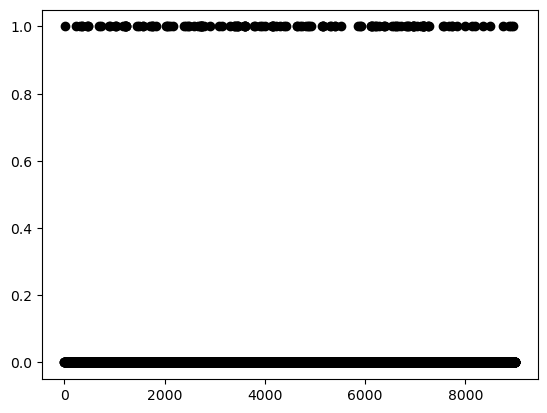

In [107]:
plt.plot(list(range(len(trainingData[0][0]))), trainingData[0][0], 'o', color='black')

In [108]:
target

array([339])

In [109]:
data

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
import torch
from torch import nn

In [111]:
model = nn.Sequential(
          nn.Linear(len(data),len(data)),
          nn.ReLU(),
          nn.Linear(len(data),len(data)),
          nn.ReLU(),
          nn.Linear(len(data),1),
          nn.ReLU()
        )
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
model.to(device)

Sequential(
  (0): Linear(in_features=8999, out_features=8999, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8999, out_features=8999, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8999, out_features=1, bias=True)
  (5): ReLU()
)

In [112]:
MSE = nn.MSELoss()
adam = torch.optim.Adam(model.parameters(),lr=0.00001)

In [113]:
# targetPlot = torch.from_numpy(target[:,0]).float()
targetTorch = torch.tensor(target).float().to(device)
inputTorch = torch.from_numpy(data).float().to(device)

In [114]:
for _ in range(1000):
    output = model(inputTorch)
    loss = MSE(output, targetTorch)
    adam.zero_grad()
    loss.backward()
    adam.step()
    outputPlot = output.clone().detach().cpu().numpy()
    print(loss,end="\r")
    

In [115]:
outputPlot

array([339.0001], dtype=float32)

In [74]:
from torch.utils.data import DataLoader
batch_size = 10
dataPath = "/home/khood/GitHub/SNN-DNA-project/Prepocessing/data/allData"
dataPathIndex = "/home/khood/GitHub/SNN-DNA-project/Prepocessing/data/allData/index.csv"
trainingData = expermentDataloader(dataPathIndex,dataPath)
dataset = DataLoader(trainingData, batch_size=batch_size, shuffle=True)

In [96]:
device

device(type='cuda', index=1)

In [98]:
for i, data in enumerate(dataset):
    inputs, targets = data
    inputs.to(device)
    targets.to(device)
    outputs = model(inputs)
    loss = MSE(outputs, targets)
    adam.zero_grad()
    loss.backward()
    adam.step()
    outputPlot = outputs.clone().detach().cpu().numpy()
    print(loss,end="\r")
    

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:1 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)